<a href="https://colab.research.google.com/github/metinuslu/blm5103_cv_project/blob/main/transfer_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from torchvision import models
import torch.nn as nn
import torch
from torch.utils.data import Dataset, DataLoader
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import torch.optim as optim
import torchvision.transforms as transforms
import pandas as pd
import numpy as np
import os
from PIL import Image
import torchvision.transforms as transforms
import os
import matplotlib.pyplot as plt

In [2]:
# Generate synthetic image-like data
num_samples = 32  # Number of samples
channels = 3  # Number of color channels (e.g., RGB)
height, width = 162, 268  # Height and width of the image

# Generate random image-like data
X_train = torch.randn(num_samples, channels, height, width)

# Generate random label data between 0 and 4
y_train = torch.randint(0, 4, (num_samples,), dtype=torch.long)

In [3]:
X_train.shape

torch.Size([32, 3, 162, 268])

In [4]:
y_train.shape

torch.Size([32])

In [5]:
class CustomDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y

    def __repr__(self):
      return "CustomDataset"

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        # İlgili özellikleri ve etiketi seçme
        features = self.X[idx]
        target = self.y[idx]
        return features, target

In [134]:
data = CustomDataset(X_train, y_train)

In [135]:
# DataLoader
train_loader = DataLoader(data, batch_size=32, shuffle=True)

In [136]:
# Load the pretrained model
model = models.resnet50(pretrained=True)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [137]:
num_ftrs = model.fc.in_features

# Replace the fully connected layer for transfer learning
model.fc = nn.Linear(num_ftrs, 4)

In [138]:
model(X_train).shape

torch.Size([32, 4])

In [139]:
for param in model.parameters(): # freeze every layer
    param.requires_grad = False

In [140]:
for param in model.fc.parameters(): # except last fully connected layer
    param.requires_grad = True

In [141]:
# Define your loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [ ]:
num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0

    for inputs, targets in train_loader:
      print(targets.shape)
      optimizer.zero_grad()
      print(inputs.shape)
      outputs = model(inputs)
      print(outputs)
      loss = criterion(outputs, targets)
      loss.backward()
      optimizer.step()
      running_loss += loss.item()

    # Print average loss per epoch
    print(f"Epoch [{epoch + 1}/{num_epochs}] - Loss: {running_loss / len(train_loader)}")

In [64]:
inputs.shape

torch.Size([32, 32, 162, 268, 3])

In [128]:
type(criterion)

torch.nn.modules.loss.CrossEntropyLoss

In [129]:
torch.unique(targets)

tensor([0, 1, 2, 3, 4])

# Images

In [3]:
data = pd.read_csv("/content/drive/MyDrive/blm5103_cv_project/blm5103_cv_project/data/processed/MasterData.csv.gz")

In [23]:
class CustomDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y

    def __repr__(self):
      return "CustomDataset"

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        # İlgili özellikleri ve etiketi seçme
        features = self.X[idx]
        target = self.y[idx]
        return features, target

In [4]:
!unzip -uq "/content/drive/MyDrive/blm5103_cv_project/data/SampleMoviePosters.zip" -d "/content/drive/MyDrive/blm5103_cv_project/data"

In [5]:
df = data[["ImgId", "ImgName","Title", "Genre1"]]

In [6]:
encoder = LabelEncoder()

In [7]:
df['encoded_genre'] = encoder.fit_transform(df['Genre1'])

<ipython-input-7-68de2e8c4d1e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['encoded_genre'] = encoder.fit_transform(df['Genre1'])


In [8]:
df["encoded_genre"].unique()

array([3, 2, 0, 1])

In [9]:
preprocess = transforms.ToTensor()
image_tensors_train = []
image_tensors_test =[]

In [10]:
df

,ImgId,ImgName,Title,Genre1,encoded_genre
0,2461,2461.jpg,Richard III (1912),Drama,3
1,2544,2544.jpg,TrÌ_dgÌ´rdsmÌ_staren (1912),Drama,3
2,2795,2795.jpg,Death's Marathon (1913),Drama,3
3,2844,2844.jpg,FantÌ«mas: In the Shadow of the Guillotine (1913),Crime,2
4,2985,2985.jpg,The House of Darkness (1913),Drama,3
...,...,...,...,...,...
806,25555,25555.jpg,Nana (1934),Drama,3
807,25580,25580.jpg,Now and Forever (1934),Drama,3
808,25586,25586.jpg,Of Human Bondage (1934),Drama,3
809,25590,25590.jpg,The Old Fashioned Way (1934),Comedy,1


In [11]:
# Separate features and target columns
X = df[["ImgId",'ImgName',"Title"]]  # Features (input)
y = df['encoded_genre']  # Target (output)

# Split the data using train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [12]:
IMAGES_PATH = "/content/drive/MyDrive/blm5103_cv_project/data/SampleMoviePosters/SampleMoviePosters"

for index, row in X_train.iterrows():
    image_filename = row['ImgName']
    image_path = os.path.join(IMAGES_PATH, image_filename)

    if os.path.exists(image_path):  # Check if the image file exists
        image = Image.open(image_path)
        # Apply transformations to the image and append to the list
        image_tensor = preprocess(image)
        image_tensors_train.append(image_tensor)
    else:
        print(f"Image {image_filename} not found in the specified folder.")

In [13]:
for index, row in X_test.iterrows():
    image_filename = row['ImgName']
    image_path = os.path.join(IMAGES_PATH, image_filename)

    if os.path.exists(image_path):  # Check if the image file exists
        image = Image.open(image_path)
        # Apply transformations to the image and append to the list
        image_tensor = preprocess(image)
        image_tensors_test.append(image_tensor)
    else:
        print(f"Image {image_filename} not found in the specified folder.")

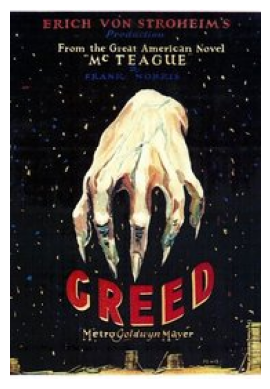

In [14]:
image_np = image_tensors_train[0].permute(1, 2, 0).cpu().numpy()
plt.imshow(image_np)
plt.axis('off')  # Hide axis
plt.show()

In [15]:
X_train

,ImgId,ImgName,Title
239,15881,15881.jpg,Greed (1924)
445,20945,20945.jpg,Half Shot at Sunrise (1930)
333,18773,18773.jpg,The Circus (1928)
292,17621,17621.jpg,A Daughter of Destiny (1928)
628,23385,23385.jpg,Red-Headed Woman (1932)
...,...,...,...
71,7832,7832.jpg,The Cure (1917)
106,10418,10418.jpg,Male and Female (1919)
270,16847,16847.jpg,Faust (1926)
435,20793,20793.jpg,Escape from Dartmoor (1929)


In [16]:
X_train = torch.stack(image_tensors_train)
X_test = torch.stack(image_tensors_test)

In [17]:
X_train.shape

torch.Size([648, 3, 268, 182])

In [18]:
X_test.shape

torch.Size([163, 3, 268, 182])

In [20]:
y_train = torch.tensor(y_train.values)
y_test = torch.tensor(y_test.values)

In [21]:
print(y_train.shape)
print(y_test.shape)

torch.Size([648])
torch.Size([163])


In [59]:
image_data_train = CustomDataset(X_train, y_train)

In [60]:
image_data_test = CustomDataset(X_test, y_test)

In [62]:
# DataLoader
train_loader = DataLoader(image_data_train, batch_size=32, shuffle=True, pin_memory = True)
test_loader = DataLoader(image_data_test, batch_size=32, shuffle=True, pin_memory = True)

In [63]:
# Load the pretrained model
model = models.resnet50(pretrained=True)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [64]:
for param in model.parameters(): # freeze every layer
    param.requires_grad = False

In [65]:
for param in model.fc.parameters(): # except last fully connected layer
    param.requires_grad = True

In [66]:
# Define your loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [67]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [68]:
device

device(type='cuda', index=0)

In [69]:
model = model.to(device)

In [ ]:
num_epochs = 100
# Training loop
for epoch in range(num_epochs):
    model.train()  # Set the model to train mode
    running_loss = 0.0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()  # Clear gradients
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()  # Backpropagation
        optimizer.step()  # Update weights

        running_loss += loss.item()

    # Compute average loss per epoch
    avg_loss = running_loss / len(train_loader)
    print(f"Epoch [{epoch + 1}/{num_epochs}] - Average Loss: {avg_loss}")

In [75]:
labels

tensor([1, 1, 0, 1, 3, 3, 3, 2], device='cuda:0')

In [77]:
inputs.shape

torch.Size([8, 3, 268, 182])

In [94]:
# Evaluation
model.eval()  # Set the model to evaluation mode
correct = 0
total = 0

predictions = []
true_labels = []

decoded_predictions = []
decoded_labels = []

with torch.no_grad():
    for inputs, labels in test_loader:
      inputs, labels = inputs.to(device), labels.to(device)
      outputs = model(inputs)
      _, predicted = torch.max(outputs, 1)

      predictions.extend(predicted.cpu().numpy())  # Convert to CPU and store as numpy array
      true_labels.extend(labels.cpu().numpy())

      decoded_predictions.extend([encoder.inverse_transform([p.item()]) for p in predicted])
      decoded_labels.extend([encoder.inverse_transform([l.item()]) for l in labels])

      total += labels.size(0)
      correct += (predicted == labels).sum().item()

accuracy = correct / total
print(f"Accuracy on Test Set: {accuracy}")

Accuracy on Test Set: 0.5398773006134969


In [ ]:
decoded_predictions

In [ ]:
decoded_labels

In [ ]:
X_test

In [99]:
X_test.shape

torch.Size([163, 3, 268, 182])

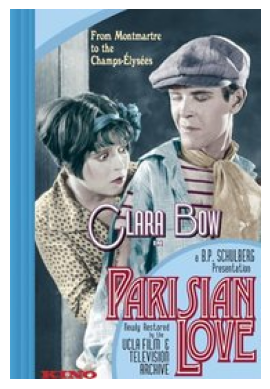

Prediction: ['Drama']
Label: ['Adventure']


In [102]:
image_np = X_test[0].permute(1, 2, 0).cpu().numpy()
plt.imshow(image_np)
plt.axis('off')  # Hide axis
plt.show()
print(f"Prediction: {decoded_predictions[0]}")
print(f"Label: {decoded_labels[0]}")

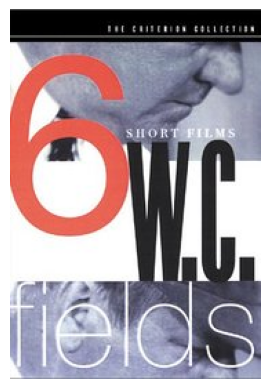

Prediction: ['Comedy']
Label: ['Comedy']


In [105]:
image_np = X_test[1].permute(1, 2, 0).cpu().numpy()
plt.imshow(image_np)
plt.axis('off')  # Hide axis
plt.show()
print(f"Prediction: {decoded_predictions[1]}")
print(f"Label: {decoded_labels[1]}")